# Exo 5.6

In [10]:
# solution de l'exercice 5.6 du cahier d'exercices
# Clemente Gotelli 25 avril 2024
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Q = 6 #[m3/s]
B = 4 #[m]
q = 1.5 #[m2/s]
g = 9.81 #[m/s2]
i1 = 0.200 #[-]
i2 = 0.005 #[-]
d90 = 0.2 #[m]
K = 23.2/(d90)**(1/6) #Formule de Jäggi [m^(1/3)/s]

hn1 = (Q/(B*K*i1**0.5))**(3/5)
hn2 = (Q/(B*K*i2**0.5))**(3/5)
hc = (Q/(B*g**0.5))**(2/3)
                      
# Define the ODE system
                      
def h_amont(h, x):
    dhdx = i2*(1 - (hn2/h)**(10/3))/(1 - (hc/h)**3)
    return dhdx

# Set the initial conditions and time span
xspan = np.linspace(0, 14, 100) # Set the space span
h0 = hn1 # Set the initial condition
                      
# Solve the ODE system using odeint
sol = odeint(h_amont, h0, xspan)

# Extract the solution
x2 = xspan
h2 = sol

# Calcul du nombre de Froude
Fr2 = q/(g*h2**3)**0.5

# Calcul de la hauteur conjuguée
h2c = h2*0.5*(-1 + (1 + 8*Fr2**2)**0.5);
                      
                      
 

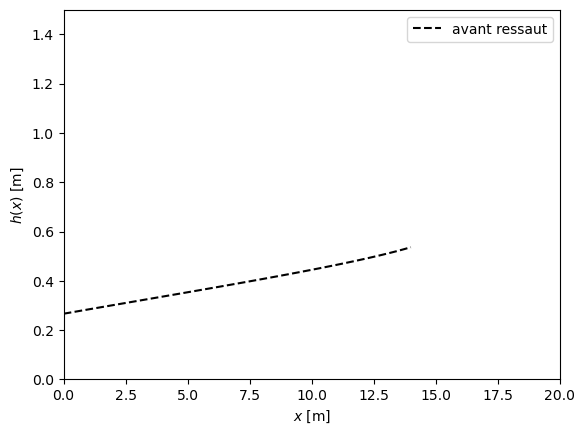

In [11]:
plt.plot(x2, h2, 'k--', label='avant ressaut')
plt.xlabel('$x$ [m]')
plt.ylabel('$h(x)$ [m]')
plt.legend()
plt.xlim((0,20))
plt.ylim((0,1.5))
plt.show()

In [12]:
#Define the ODE system
def h_aval(h,x):
    dhdx = i2*(1- (hn2/h)**(10/3))/(1 - (hc/h)**3 )
    return dhdx

# Set the initial conditions and time span
xspan = np.linspace(20, 0, 100) # Set the space span
h0 = hn2 # Set the initial condition

# Solve the ODE system using solve_ivp
sol = odeint(h_aval, h0, xspan)

# Extract the solution
x3 = xspan
h3 = sol
                  

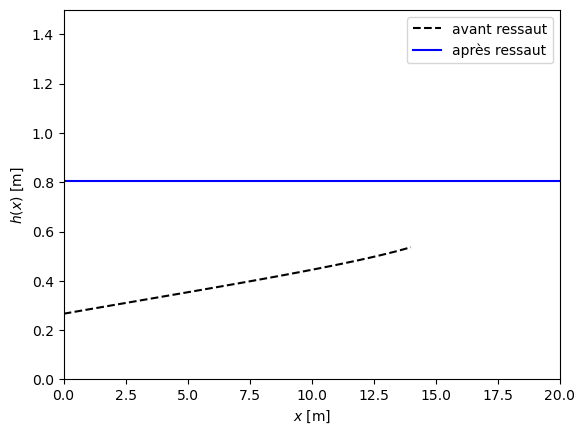

In [13]:
plt.plot(x2, h2, 'k--', label='avant ressaut')
plt.plot(x3, h3, 'b-', label='après ressaut')
plt.xlabel('$x$ [m]')
plt.ylabel('$h(x)$ [m]')
plt.legend()
plt.xlim((0,20))
plt.ylim((0,1.5))
plt.show()

In [14]:
# Calcul du nombre de Froude
Fr3 = q/(g*h3**3)**0.5

# Calcul de la hauteur conjuguée
h3c = h3*0.5*(-1 + (1 + 8*Fr3**2)**0.5)

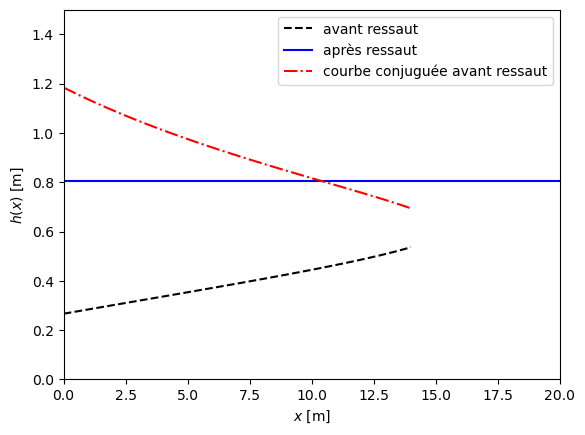

In [15]:
plt.plot(x2, h2, 'k--', label='avant ressaut')
plt.plot(x3, h3, 'b-', label='après ressaut')
plt.plot(x2, h2c, 'r-.', label = 'courbe conjuguée avant ressaut')
plt.xlabel('$x$ [m]')
plt.ylabel('$h(x)$ [m]')
plt.legend()
plt.xlim((0,20))
plt.ylim((0,1.5))
plt.show()


In [16]:
from scipy.interpolate import interp1d
from scipy.optimize import newton

# reduce dimensions for interp1d function
h2c = np.squeeze(h2c, axis=1)
h3 = np.squeeze(h3, axis=1)

# interpolate the curves as functions
f = interp1d(x2, h2c)
g = interp1d(x3, h3)

# define the function that computes the difference between the two curves
def h(x):
    return f(x) - g(x)

# find the intersection point using the Newton-Raphson method
x_intersect = newton(h, 1, tol=1)

# compute the y-coordinate of the intersection point using either of the curves
y_intersect = f(x_intersect)

print('Le ressaut est positionné à ' + "{:.2f}".format(x_intersect)+ ' metres')

Le ressaut est positionné à 10.33 metres
